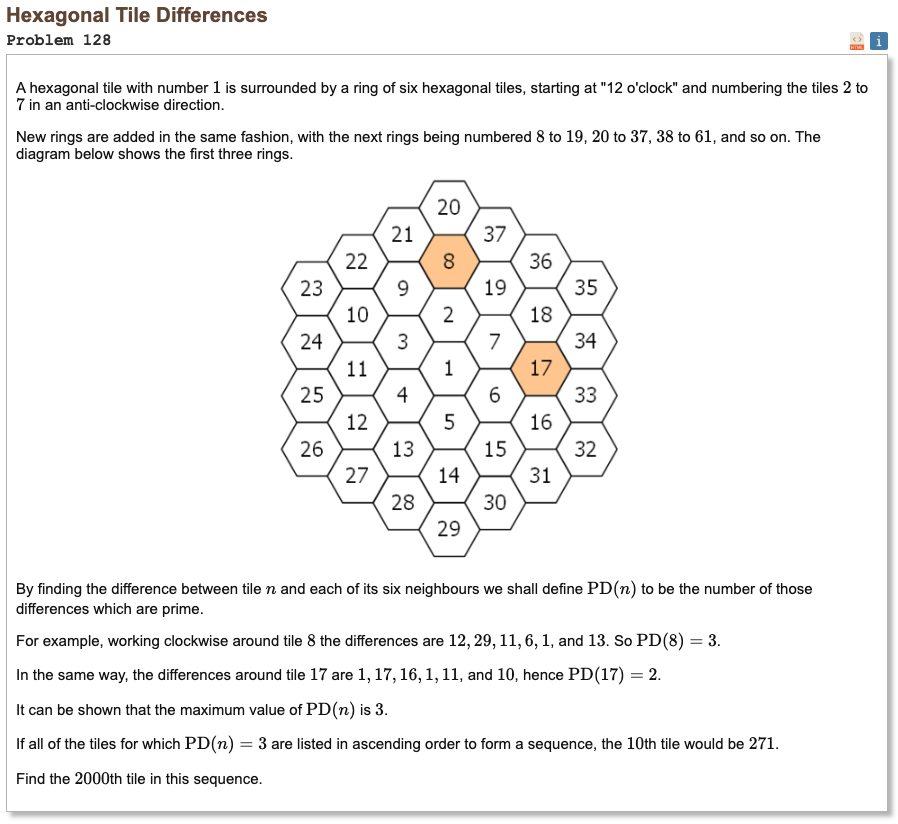

## Initial approach

* we look at a hexagonal spiral of tiles (like honeycomb)
* wach tile has a number. the center is 1, then spiral expands outward
* for each tile, we check the numbers on its 6 neighbors
* we calculate the difference between the tile number and each neighbor
* if exactly 3 of those differences are prime numbers, the tile is “special”
* the problem asks: find the 2000th special tile’s number
* direct simulation is too slow, but pattern exists on outer layers
* use formula for candidate tiles on spiral corners and check them

```python

def is_prime(n):
    if n < 2:
        return False
    if n % 2 == 0:
        return n == 2
    p = 3
    while p * p <= n:
        if n % p == 0:
            return False
        p += 2
    return True

def count_prime_diffs(tile, neighbors):
    diffs = [abs(tile - nb) for nb in neighbors]
    return sum(is_prime(d) for d in diffs)

def generate_special(limit):
    specials = [1, 2]  
    n = 1
    while len(specials) < limit:
        layer = 6 * n
        tile1 = 3*n*(n-1) + 2
        tile2 = 3*n*(n+1) + 1
        for tile in (tile1, tile2):
            if tile == tile1:
                neighbors = [tile-1, tile+1, tile-layer, tile-layer+1, tile+layer-1, tile+layer]
            else:
                neighbors = [tile-1, tile+1, tile-layer, tile-layer+1, tile+layer, tile+layer+1]
            if count_prime_diffs(tile, neighbors) == 3:
                specials.append(tile)
        n += 1
    return specials

result = generate_special(2000)[-1]
print("Result", result)
````

* it is too slow
* optimized code uses formulas for only two candidate tiles per layer and checks just a few differences with fast prime tests

In [1]:
def is_prime(n):
    if n < 2:
        return False
    if n % 2 == 0:
        return n == 2
    f = 3
    while f * f <= n:
        if n % f == 0:
            return False
        f += 2
    return True

def generate_specials(limit):
    specials = [2]
    ring = 1
    while len(specials) < limit:
        tile1 = 3*ring*(ring-1) + 2
        if is_prime(6*ring-1) and is_prime(6*ring+1) and is_prime(12*ring+5):
            specials.append(tile1)
        if len(specials) >= limit:
            break
        tile2 = 3*ring*(ring+1) + 1
        if is_prime(6*ring-1) and is_prime(6*ring+5) and is_prime(12*ring-7):
            specials.append(tile2)
        ring += 1
    return specials

specials = generate_specials(2001)
print("2000th special tile:", specials[2000])

2000th special tile: 14516824220
